In [1]:
import numpy as np

In [2]:
import fitsio

In [3]:
import proplot as pplt

In [4]:
d = fitsio.read("mdet_data/DES0000+0209_metadetect-v8_mdetcat_part0000.fits")

In [5]:
d.dtype.names

('slice_id',
 'mdet_step',
 'ra',
 'dec',
 'ra_noshear',
 'dec_noshear',
 'y_noshear',
 'x_noshear',
 'y',
 'x',
 'slice_y',
 'slice_x',
 'slice_y_noshear',
 'slice_x_noshear',
 'hpix_16384',
 'hpix_16384_noshear',
 'filename',
 'tilename',
 'mask_flags',
 'mask_flags_noshear',
 'nepoch_g',
 'nepoch_r',
 'nepoch_i',
 'nepoch_z',
 'nepoch_eff_g',
 'nepoch_eff_r',
 'nepoch_eff_i',
 'nepoch_eff_z',
 'pgauss_flags',
 'pgauss_psf_flags',
 'pgauss_psf_g_1',
 'pgauss_psf_g_2',
 'pgauss_psf_T',
 'pgauss_obj_flags',
 'pgauss_s2n',
 'pgauss_g_1',
 'pgauss_g_2',
 'pgauss_g_cov_1_1',
 'pgauss_g_cov_1_2',
 'pgauss_g_cov_2_2',
 'pgauss_T',
 'pgauss_T_flags',
 'pgauss_T_err',
 'pgauss_T_ratio',
 'pgauss_band_flux_flags_g',
 'pgauss_band_flux_flags_r',
 'pgauss_band_flux_flags_i',
 'pgauss_band_flux_flags_z',
 'pgauss_band_flux_g',
 'pgauss_band_flux_r',
 'pgauss_band_flux_i',
 'pgauss_band_flux_z',
 'pgauss_band_flux_err_g',
 'pgauss_band_flux_err_r',
 'pgauss_band_flux_err_i',
 'pgauss_band_flux_err

In [18]:
msk = (
    (d["gauss_flags"] == 0)
    & (d["pgauss_flags"] == 0)
    & (d["mask_flags"] == 0)
    & (d["psfrec_flags"] == 0)
    & (d["mdet_step"] == "noshear")
    & (d["gauss_s2n"] > 10)
    & (d["gauss_T_ratio"] > 0.5)
)
np.sum(msk), np.mean(msk)

(18655, 0.011864995369757905)

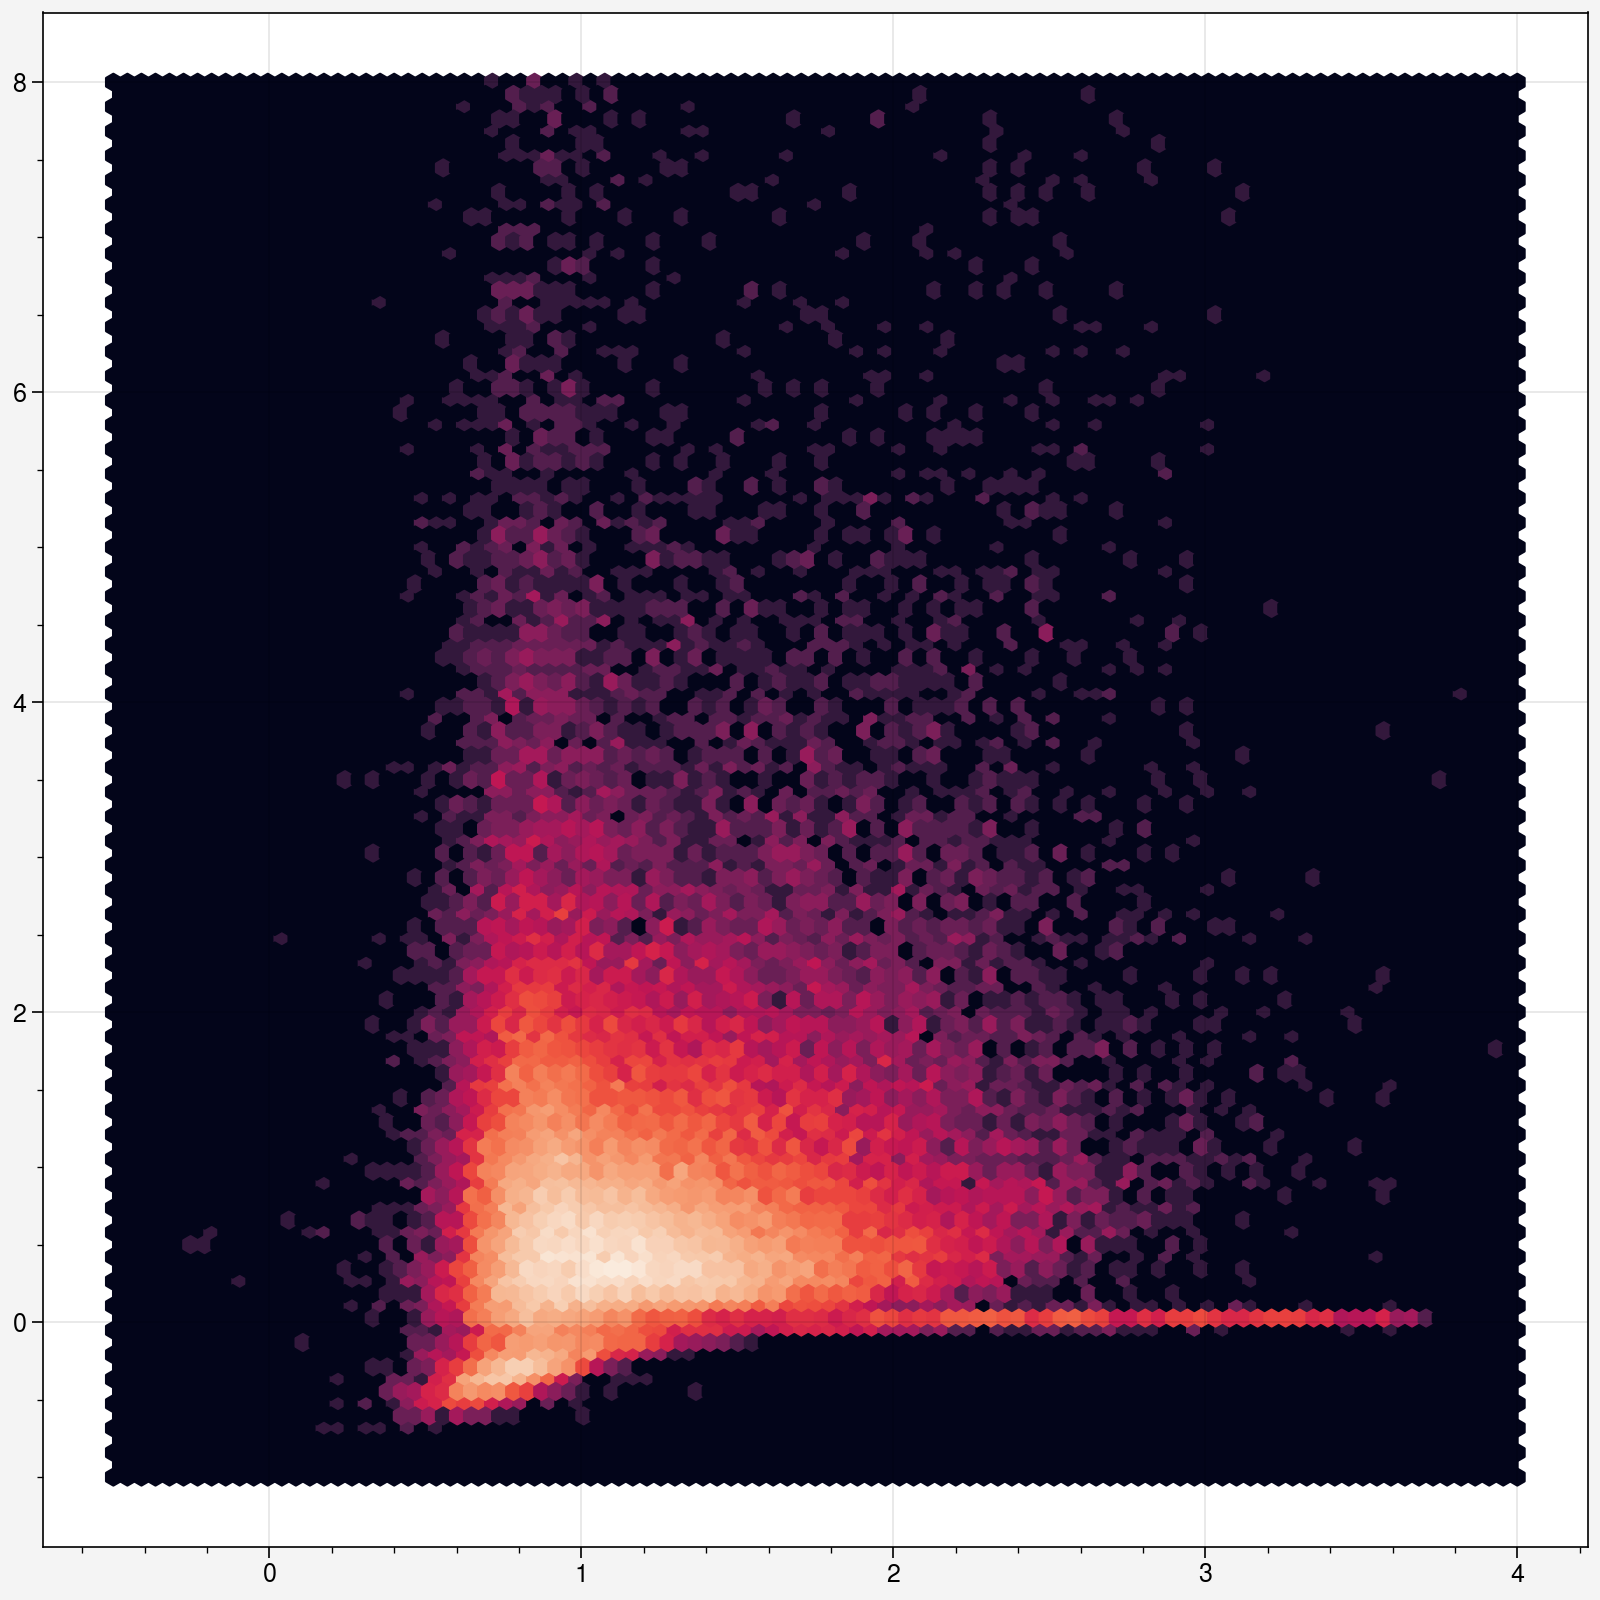

In [17]:
fig, axs = pplt.subplots(figsize=(8, 8))

axs.hexbin(
    np.log10(d["gauss_s2n"][msk]), 
    d["gauss_T_ratio"][msk], 
    cmap="rocket",
    norm="log",
    extent=(-0.5, 4, -1, 8)
)

<a list of 1 Line2D objects>

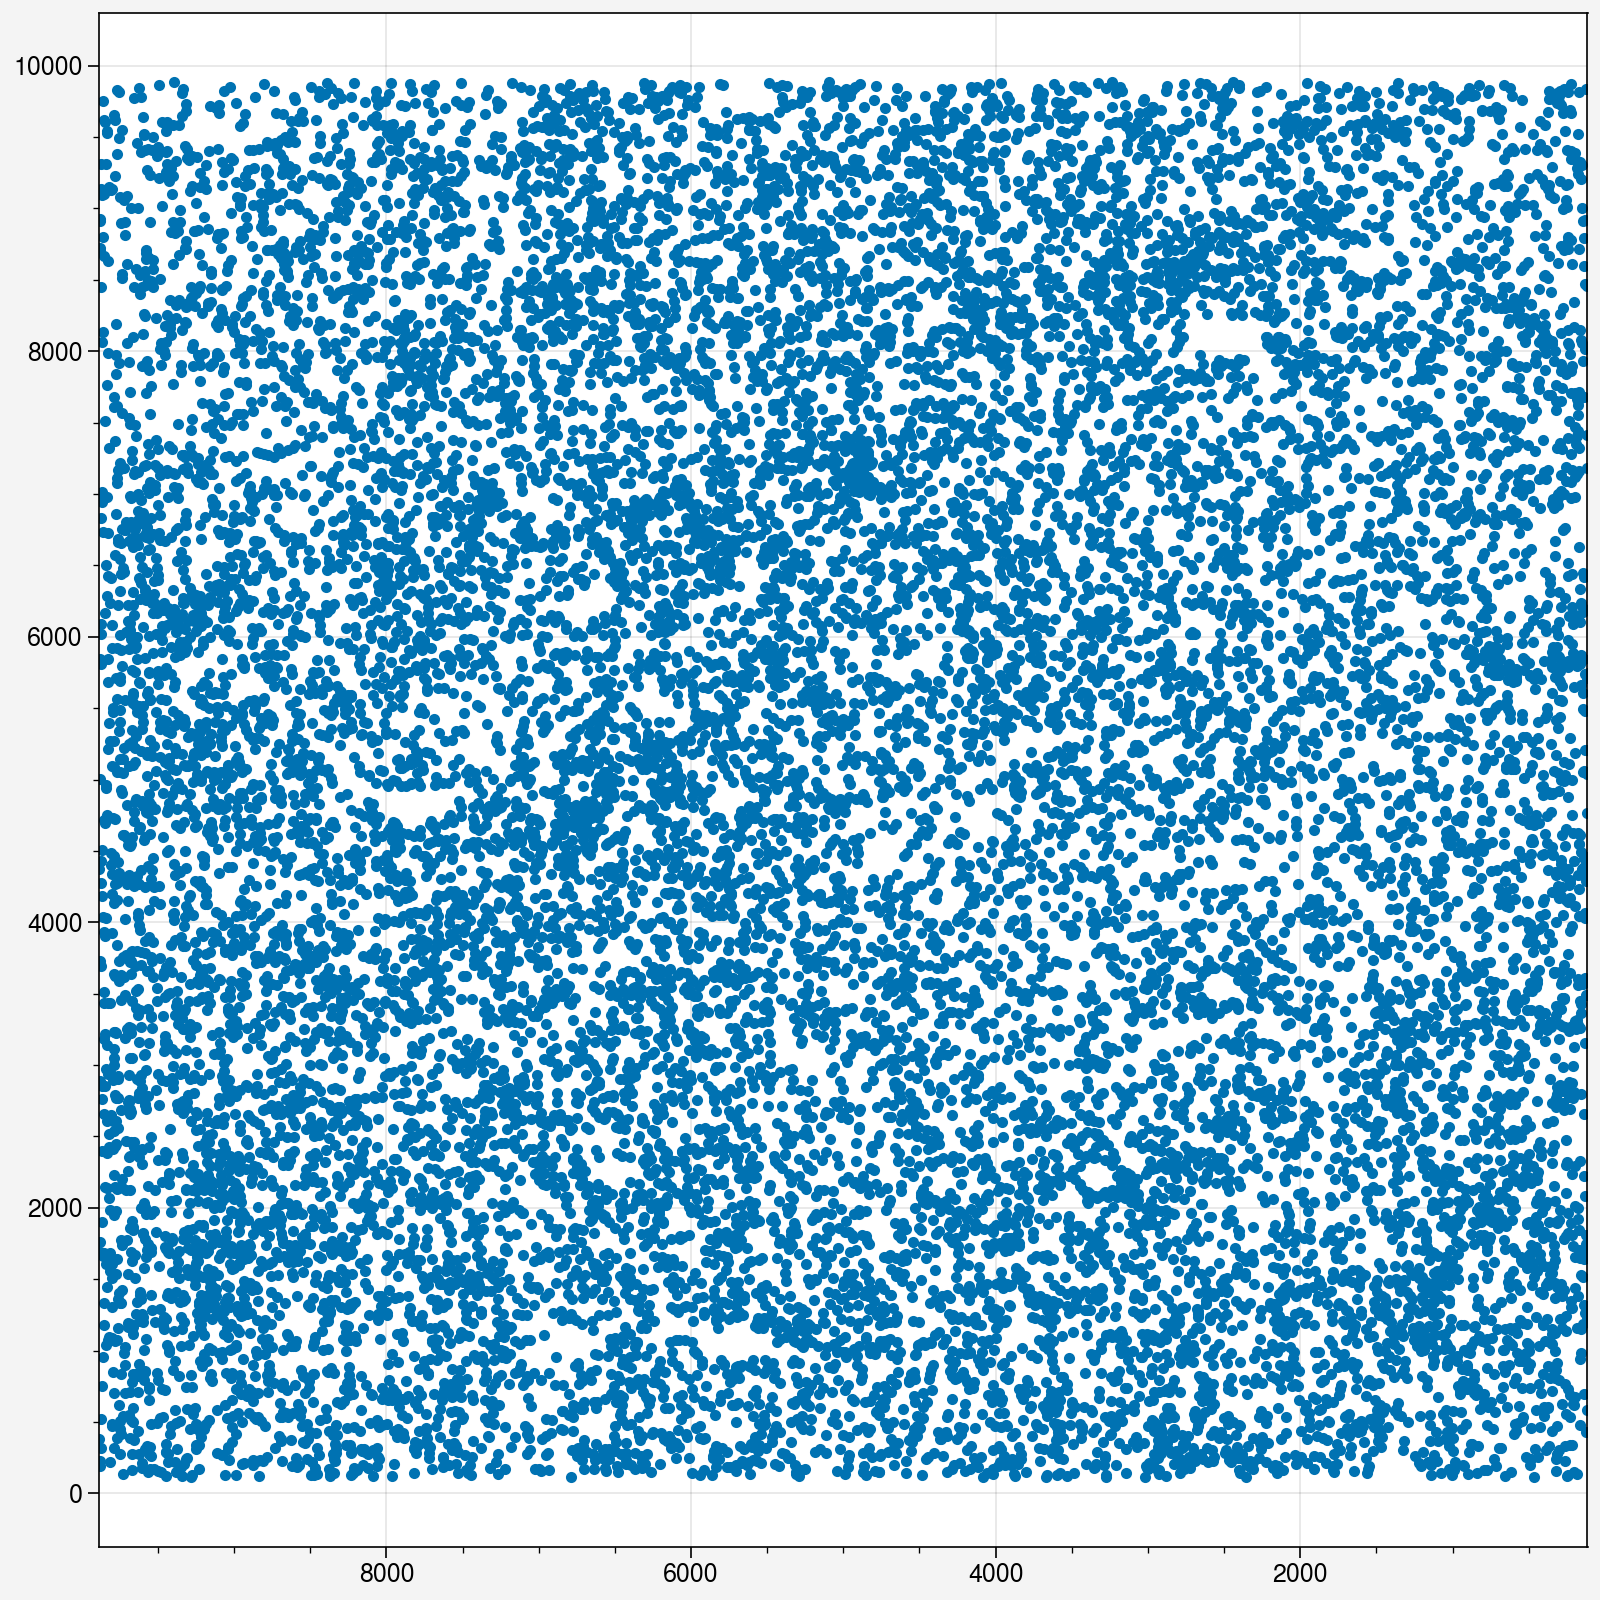

In [22]:
fig, axs = pplt.subplots(figsize=(8, 8))

axs.plot(d["x"][msk], d["y"][msk], '.')